In [108]:
#for this part to run you need to install the scikit learn library so that you are able to import sklearn
#try the following code:
#pip install -U scikit-learn scipy matplotlib

import pandas as pnds
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as tnn
import torch.nn.functional as tFunc

In [109]:
iris = pnds.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

mappings = {
   'Setosa': 0,
   'Versicolor': 1,
   'Virginica': 2}

iris['variety'] = iris['variety'].apply(lambda x: mappings[x])

In [110]:
X = iris.drop('variety', axis=1).values
y = iris['variety'].values
trdata_X, tstdata_X, trdata_y,tstdata_y = train_test_split(X, y, test_size=0.2, random_state=20)
trdata_X = torch.FloatTensor(trdata_X)
tstdata_X = torch.FloatTensor(tstdata_X)
trdata_y = torch.LongTensor(trdata_y)
y_test = torch.LongTensor(tstdata_y)

In [111]:
class ANN(tnn.Module):
   def __init__(self):
       super().__init__()
       self.fllyconnctd1 = tnn.Linear(in_features=4, out_features=25)
       self.fllyconnctd2 = tnn.Linear(in_features=25, out_features=15)
       self.output = tnn.Linear(in_features=15, out_features=3)
 
   def forward(self, x):
       x = tFunc.relu(self.fllyconnctd1(x))
       x = tFunc.relu(self.fllyconnctd2(x))
       x = self.output(x)
       return x

In [112]:
model = ANN()
lossfunc = tnn.CrossEntropyLoss()
updater = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

Epoch: 0 Loss: 1.2011162042617798
Epoch: 10 Loss: 1.038694977760315
Epoch: 20 Loss: 0.8858512043952942
Epoch: 30 Loss: 0.6587054133415222
Epoch: 40 Loss: 0.47814610600471497
Epoch: 50 Loss: 0.38547077775001526
Epoch: 60 Loss: 0.32016295194625854
Epoch: 70 Loss: 0.2550519108772278
Epoch: 80 Loss: 0.20327088236808777
Epoch: 90 Loss: 0.16434356570243835
Epoch: 100 Loss: 0.13748709857463837
Epoch: 110 Loss: 0.11955271661281586
Epoch: 120 Loss: 0.1074429452419281
Epoch: 130 Loss: 0.09893741458654404
Epoch: 140 Loss: 0.09266132861375809
Epoch: 150 Loss: 0.08786382526159286
Epoch: 160 Loss: 0.08410026133060455
Epoch: 170 Loss: 0.08103001117706299
Epoch: 180 Loss: 0.07846446335315704
Epoch: 190 Loss: 0.07627558708190918


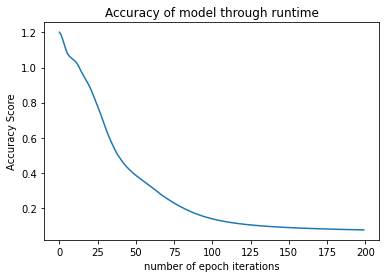

CPU times: user 316 ms, sys: 27.1 ms, total: 343 ms
Wall time: 328 ms


In [113]:
%%time


epoch = 200
lossarray = []
for i in range(epoch):
   target = model.forward(trdata_X)
   loss = lossfunc(target, trdata_y)
   lossarray.append(loss)
 
   if i % 10 == 0:
       print(f'Epoch: {i} Loss: {loss}')
 
   updater.zero_grad()
   loss.backward()
   updater.step()
  
plt.plot(range(epoch), lossarray)
plt.xlabel('number of epoch iterations')
plt.ylabel('Accuracy Score')
plt.title('Accuracy of model through runtime')
plt.show()

In [114]:
prediction = []
with torch.no_grad():
   for val in tstdata_X:
       target = model.forward(val)
       prediction.append(target.argmax().item())

In [115]:
df = pnds.DataFrame({'target':tstdata_y, 'predicted': prediction})
df['right'] = [1 if corr == pred else 0 for corr, pred in zip(df['target'], df['predicted'])]
df['right'].sum() / len(df)

0.9666666666666667